__Introduction__<br>

People usually change cars often & hence second hand/used cars market is big one. I was curious to understand what are the features that drive the price of the used cars.<br>
This data is collected from CarDekho & available in Kaggle, contains 6440 rows of data of FIVE seater cars.<br>

This was an interesting data to work on & utilize my learnings from Udacity Course & hence this project. <br>

Following are the questions i would like to answer using Exploratory Data Analysis & Modeling using Linear Regression <br>
Q1. When is the best time to sell the car? <br>
Q2. Is the selling price better when car is sold by owner/seller type? <br>
Q3. Prediction of 'Selling Price' of Car <br>



__Importing required libraries__

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import datetime
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import KNNImputer
from matplotlib.ticker import FuncFormatter
%matplotlib inline

plt.rcParams['figure.figsize'] = [13,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

__Importing 'cars' dataset. Data Source - /kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv__

In [3]:
cars = pd.read_csv(r'C:\Prasanna\Udacity\Udacity_Proj_1\Car details v3.csv')

__Exploratory Data Analysis__

In [42]:
#Lets see how our data looks like
cars.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),max_power (bhp),age
0,75000,90000,Diesel,Individual,Manual,Second,12.80,1489.0,35.5,20
1,99000,100000,Diesel,Individual,Manual,Second,12.80,1995.0,52.0,26
2,122000,60000,Diesel,Individual,Manual,Second,12.80,1995.0,52.0,12
3,200000,80000,Diesel,Individual,Manual,Third,13.50,1995.0,52.0,12
4,2600000,70000,Diesel,Individual,Automatic,First,20.38,1968.0,143.0,3


In [43]:
#Lets see number of rows & columns in the data set
cars.shape

(6440, 10)

_There are 6440 rows and 11 columns in the data set_

In [37]:
#What are the data types of the variables
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6440 entries, 0 to 6439
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6440 non-null   object 
 1   year             6440 non-null   int64  
 2   selling_price    6440 non-null   int64  
 3   km_driven        6440 non-null   int64  
 4   fuel             6440 non-null   object 
 5   seller_type      6440 non-null   object 
 6   transmission     6440 non-null   object 
 7   owner            6440 non-null   object 
 8   mileage (kmpl)   6254 non-null   float64
 9   engine (CC)      6254 non-null   float64
 10  max_power (bhp)  6254 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 553.6+ KB


In [38]:
#Summary Statistics of the dataset
cars.describe()

,year,selling_price,km_driven,mileage (kmpl),engine (CC),max_power (bhp)
count,6440.000000,6.440000e+03,6.440000e+03,6254.000000,6254.000000,6254.000000
mean,2013.975932,6.183310e+05,6.424055e+04,20.407248,1315.939878,88.489193
std,3.921763,8.339014e+05,5.192954e+04,3.450379,343.327714,33.766608
min,1994.000000,3.000000e+04,1.000000e+00,9.000000,793.000000,32.800000
25%,2011.000000,2.500000e+05,3.000000e+04,18.120000,1194.000000,68.000000
50%,2015.000000,4.099990e+05,6.000000e+04,20.300000,1248.000000,81.800000
75%,2017.000000,6.400000e+05,9.000000e+04,22.770000,1493.000000,97.700000
max,2020.000000,6.523000e+06,2.360457e+06,33.000000,3604.000000,282.000000


_Since the data is gradually increasing from min to max, i do not see any outliers in the data_

_Looking at the count statistic above: 
mileage (kmpl), engine (CC) and max_power (bhp) seems to have 186 (2.9%) missing values._

__Data Preparation__<br>
1. Since 'name' of the car model is not of much use, we will drop that column<br>
2. 'Year' variable doesnt make much sense, instead we will convert the same to "age of the car"<br>
3. Drop 'Year' variable too<br>

In [40]:
# Converting current year to int and then subtracting 'year' so that both are in same data type
today = str(datetime.date.today())
CurrentYear = int(today[:4])
cars['age'] = CurrentYear - cars['year']

In [40]:
cars = cars.drop(['year','name'], axis=1)

In [9]:
cars.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),max_power (bhp),age
0,75000,90000,Diesel,Individual,Manual,Second,12.80,1489.0,35.5,20
1,99000,100000,Diesel,Individual,Manual,Second,12.80,1995.0,52.0,26
2,122000,60000,Diesel,Individual,Manual,Second,12.80,1995.0,52.0,12
3,200000,80000,Diesel,Individual,Manual,Third,13.50,1995.0,52.0,12
4,2600000,70000,Diesel,Individual,Automatic,First,20.38,1968.0,143.0,3


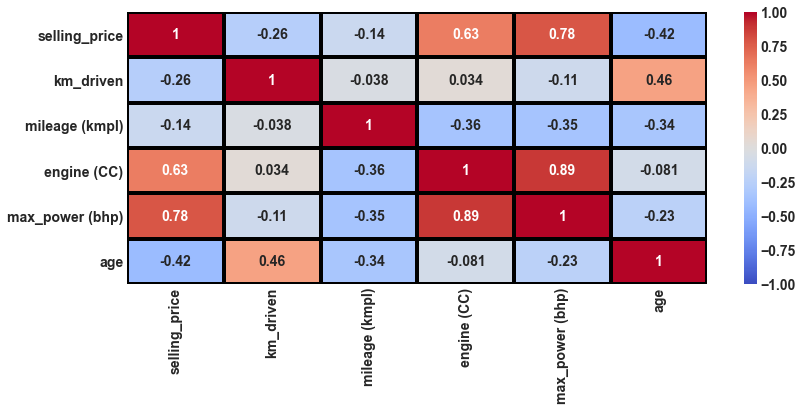

In [41]:
#Heatmap
sns.heatmap(cars.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm', lw = 3, linecolor = 'black')

__Question 1__ - When is the best time to sell the car?

1. 51% of the cars are sold during 1 to 5 years of the 'age' of the car. <br>
2. Selling price of car is highest within 1 year of age, similar selling price during age of 2 & 3 years and then gradually decreases.<br>
3. As age of the car increases, selling price decreases, shows a moderate negative correlation between both variables.<br>
4. All car fuel types (Diesel, Petrol, CNG, LPG) follow a similar trend, however Diesel cars have higher selling price

__Since countplot is reused, creating a function along with docstrings__

In [60]:
def countplot(var, df, *args, **kwargs):
    ''' 
    Function to plot countplot using seaborn library.
    Takes two arguments:
    First argument var is 'x' and
    Second argument df is 'data'
    '''
    #plt.figure()
    ax = sns.countplot(x=var, data=df)
    return ax;
 


Text(0.5, 1.0, 'Count of age of car when sold')

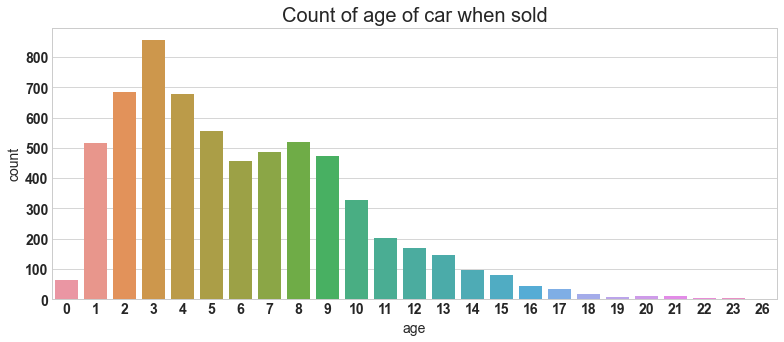

In [55]:
# Age of cars when they are sold
countplot(var = 'age',df = cars)
plt.title('Count of age of car when sold', size = 20)

Text(43.571311067708336, 0.5, 'Selling_Price in K')

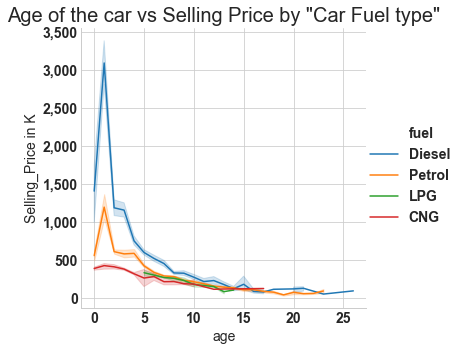

In [12]:
# How does age vs selling price vary by different car fuel types
g = sns.relplot(x='age', y='selling_price', hue = 'fuel', kind="line", data=cars)
ticks = g.axes[0][0].get_yticks()/1000
ylabels = ['{:,.0f}'.format(y) for y in ticks]
g.set_yticklabels(ylabels)
plt.title('Age of the car vs Selling Price by "Car Fuel type"', size = 20)
plt.ylabel('Selling_Price in K')

Text(0.5, 1.0, 'Selling Price v Age of the Car')

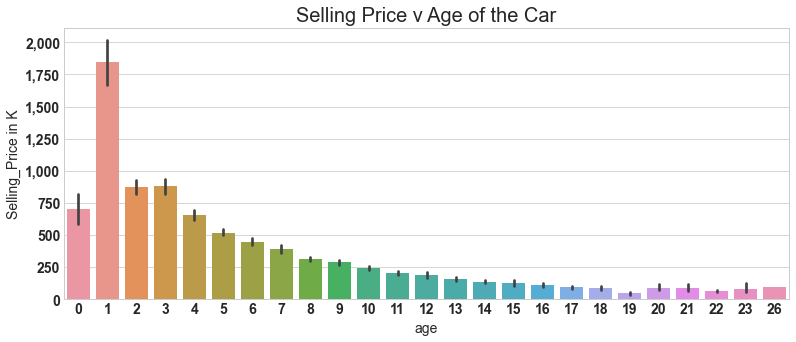

In [13]:
# Selling price vs age of car
g = sns.barplot('age','selling_price',data=cars)
ticks = g.get_yticks()/1000
ylabels = ['{:,.0f}'.format(y) for y in ticks]
g.set_yticklabels(ylabels)
plt.ylabel('Selling_Price in K')
plt.title('Selling Price v Age of the Car', size = 20)

__Question 2 - Is the selling price better when car is sold by owner/seller type?__

1. 91% of the cars sold are by first or second owner<br>
2. 81% of the cars being sold are by 'individuals' & 15% of the cars being sold are by 'Dealer'<br>
3. Cars sold by 'First' Owner 'Individually' or by 'Dealer' has great selling price


Text(0.5, 1.0, 'Count of cars sold by owner#')

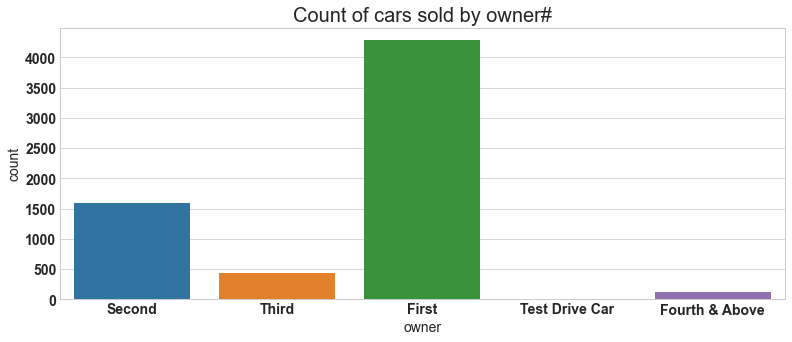

In [65]:
# Lets understand the count of 'owner' types
countplot(var = 'owner', df = cars, order = cars['owner'].value_counts().index)
plt.title('Count of cars sold by owner#', size=20)

Text(22.745000000000005, 0.5, 'Selling_Price in K')

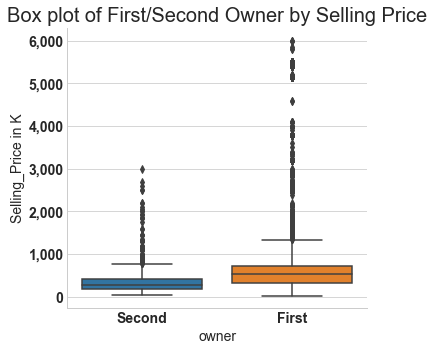

In [15]:
# Since we are interested in First/Second Owner, plotting the box plot for only those two types of owners
g = sns.catplot(x='owner',y='selling_price', kind = 'box', data = cars[(cars['owner'] == 'First') | (cars['owner'] == 'Second')])
plt.title('Box plot of First/Second Owner by Selling Price', size=20)
ticks = g.axes[0][0].get_yticks()/1000
ylabels = ['{:,.0f}'.format(y) for y in ticks]
g.set_yticklabels(ylabels)
plt.ylabel('Selling_Price in K')

Text(0.5, 1.0, 'Count of cars sold by Seller Type')

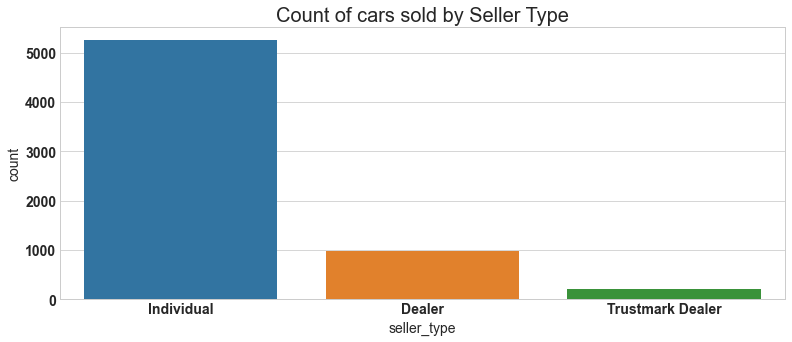

In [64]:
# Cars sold by seller type
countplot(var = 'seller_type', df = cars, order = cars['seller_type'].value_counts().index)
plt.title('Count of cars sold by Seller Type', size=20)

Text(43.5905734375, 0.5, 'Selling_Price in K')

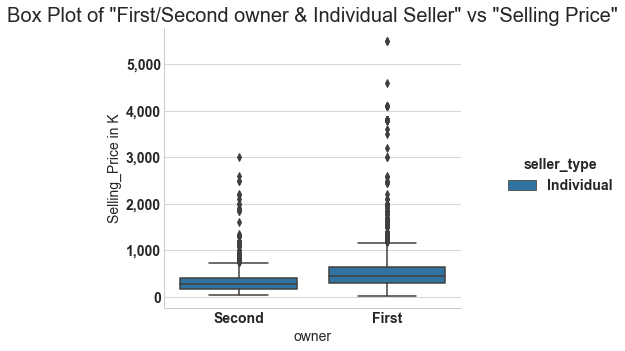

In [17]:
# Box plot of First/Second owner and Individual seller type versus Selling Price
g = sns.catplot(x='owner', y='selling_price', kind = 'box', hue = 'seller_type', data = cars[((cars['owner'] == 'First') | (cars['owner'] == 'Second')) & (cars['seller_type'] == 'Individual')])
plt.title('Box Plot of "First/Second owner & Individual Seller" vs "Selling Price"' , size=20)
ticks = g.axes[0][0].get_yticks()/1000
ylabels = ['{:,.0f}'.format(y) for y in ticks]
g.set_yticklabels(ylabels)
plt.ylabel('Selling_Price in K')

Text(40.808659375, 0.5, 'Selling_Price in K')

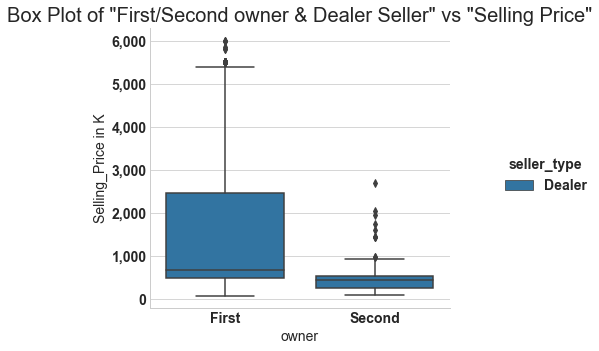

In [18]:
# Box plot of First/Second owner and Dealer seller type versus Selling Price
g = sns.catplot(x='owner', y='selling_price', kind = 'box', hue = 'seller_type', data = cars[((cars['owner'] == 'First') | (cars['owner'] == 'Second')) & (cars['seller_type'] == 'Dealer')])
plt.title('Box Plot of "First/Second owner & Dealer Seller" vs "Selling Price"' , size=20)
ticks = g.axes[0][0].get_yticks()/1000
ylabels = ['{:,.0f}'.format(y) for y in ticks]
g.set_yticklabels(ylabels)
plt.ylabel('Selling_Price in K')

__Question 3 - Prediction of 'Selling Price' of Car__

Step1 - Impute missing values in mileage (kmpl), engine (CC) and max_power (bhp)

In [19]:
#define imputer 
#neighbors calculated per sqrt(no. of samples)
imputer = KNNImputer(n_neighbors=81, weights='uniform', metric='nan_euclidean')
# fit on the data set and transform
cars['mileage (kmpl)'] = imputer.fit_transform(cars[['mileage (kmpl)']]).ravel()
cars['engine (CC)'] = imputer.fit_transform(cars[['engine (CC)']]).ravel()
cars['max_power (bhp)'] = imputer.fit_transform(cars[['max_power (bhp)']]).ravel()

In [20]:
#Check for missing values
cars.isna().sum()

selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage (kmpl)     0
engine (CC)        0
max_power (bhp)    0
age                0
dtype: int64

Step 2 - Transform categorical variables - 'fuel', 'seller_type', 'transmission', 'owner_type'

In [21]:
cars_v2 = pd.get_dummies(cars, columns = ['fuel', 'seller_type', 'transmission', 'owner'])
cars_v2.head()

,selling_price,km_driven,mileage (kmpl),engine (CC),max_power (bhp),age,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First,owner_Fourth & Above,owner_Second,owner_Test Drive Car,owner_Third
0,75000,90000,12.80,1489.0,35.5,20,0,1,0,0,0,1,0,0,1,0,0,1,0,0
1,99000,100000,12.80,1995.0,52.0,26,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,122000,60000,12.80,1995.0,52.0,12,0,1,0,0,0,1,0,0,1,0,0,1,0,0
3,200000,80000,13.50,1995.0,52.0,12,0,1,0,0,0,1,0,0,1,0,0,0,0,1
4,2600000,70000,20.38,1968.0,143.0,3,0,1,0,0,0,1,0,1,0,1,0,0,0,0


Heatmap with categorical variables

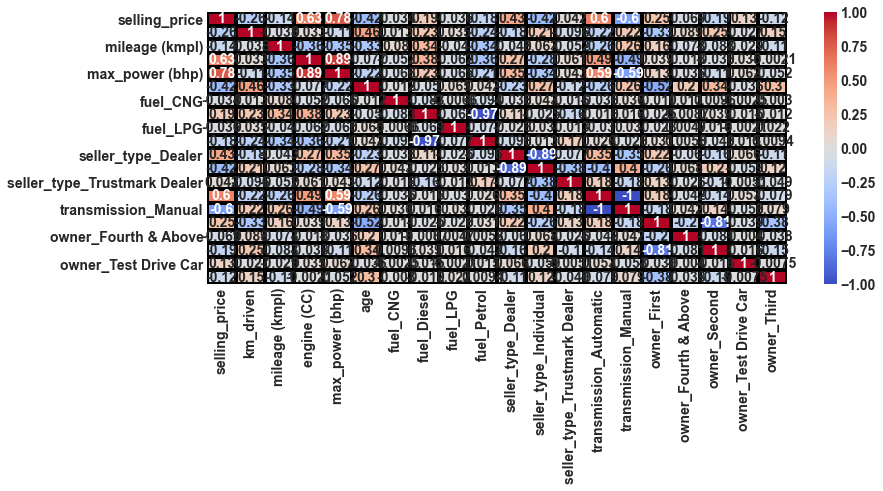

In [22]:
#Heatmap
sns.heatmap(cars_v2.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm', lw = 3, linecolor = 'black')

Step 3 - Feature Engineering

__Dropping the features as they have low counts__<br> 
1. fuel (CNG, LPG)<br>
2. Seller_type (Trustmark_Dealer) <br>
3. Owner (Fourth & Above, Test Drive car)

In [23]:
cars['fuel'].value_counts() * 100 / len(cars['age'])

Petrol    52.298137
Diesel    46.366460
CNG        0.791925
LPG        0.543478
Name: fuel, dtype: float64

In [24]:
cars['seller_type'].value_counts() * 100 / len(cars['age'])

Individual          81.521739
Dealer              15.295031
Trustmark Dealer     3.183230
Name: seller_type, dtype: float64

In [25]:
cars['transmission'].value_counts() * 100 / len(cars['age'])

Manual       85.854037
Automatic    14.145963
Name: transmission, dtype: float64

In [26]:
cars['owner'].value_counts() * 100 / len(cars['age'])

First             66.459627
Second            24.767081
Third              6.723602
Fourth & Above     1.972050
Test Drive Car     0.077640
Name: owner, dtype: float64

In [27]:
cars_v2 = cars_v2.drop(['fuel_CNG','fuel_LPG', 'seller_type_Trustmark Dealer', 'owner_Fourth & Above', 'owner_Test Drive Car'], axis=1)

In [28]:
cars_v2.head()

,selling_price,km_driven,mileage (kmpl),engine (CC),max_power (bhp),age,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual,owner_First,owner_Second,owner_Third
0,75000,90000,12.80,1489.0,35.5,20,1,0,0,1,0,1,0,1,0
1,99000,100000,12.80,1995.0,52.0,26,1,0,0,1,0,1,0,1,0
2,122000,60000,12.80,1995.0,52.0,12,1,0,0,1,0,1,0,1,0
3,200000,80000,13.50,1995.0,52.0,12,1,0,0,1,0,1,0,0,1
4,2600000,70000,20.38,1968.0,143.0,3,1,0,0,1,1,0,1,0,0


__Step 4 - Modeling__

In [29]:
X = cars_v2.loc[ : , cars_v2.columns != 'selling_price']
y = cars_v2['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

#Instantiate
lm_model = LinearRegression(normalize=True)

#Fit Training
lm_model.fit(X_train, y_train)

#Predict
y_test_preds = lm_model.predict(X_test)

#score
r_test =  r2_score(y_test, y_test_preds)


y_train_preds = lm_model.predict(X_train)
r_train = r2_score(y_train, y_train_preds)


print("r squared train: ", r_train)
print("r squared test: ", r_test)

x train:  (4508, 14)
x test:  (1932, 14)
y train:  (4508,)
y test:  (1932,)
r squared train:  0.7233817067785842
r squared test:  0.710359871984722


Text(0, 0.5, 'Predicted')

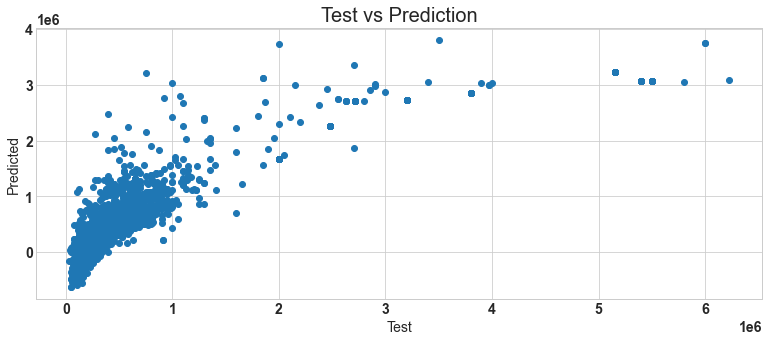

In [30]:
plt.scatter(y_test, y_test_preds)
plt.title('Test vs Prediction', size = 20)
plt.xlabel('Test')
plt.ylabel('Predicted')

In [82]:
coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = lm_model.coef_
coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
coefs_df

,est_int,coefs,abs_coefs
7,seller_type_Dealer,282554.280914,282554.280914
6,fuel_Petrol,-232668.739360,232668.739360
10,transmission_Manual,-193322.543892,193322.543892
9,transmission_Automatic,193322.543892,193322.543892
12,owner_Second,-131286.284824,131286.284824
11,owner_First,-109682.455750,109682.455750
13,owner_Third,-109596.741227,109596.741227
5,fuel_Diesel,-105340.874929,105340.874929
8,seller_type_Individual,50227.977623,50227.977623
4,age,-33584.931328,33584.931328


__Conclusion__<br>
1. Selling through Dealer or Individually, automatic tranmission, max power (bhp) of the car increase the selling price<br>
2. Manual Transmission, Petrol vehicles reduce the selling price<br>
3. As the age of the car increases, selling price decreases.

Text(0.5, 1.0, 'Linear Regression Model Co-efficients')

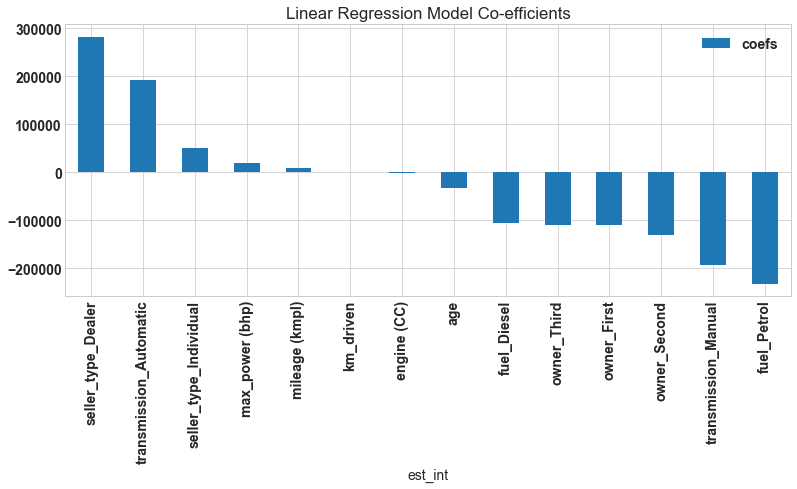

In [81]:
g = coefs_df.plot(x = 'est_int', y = 'coefs', kind = 'bar', sort_columns = 'coefs')

plt.title('Linear Regression Model Co-efficients')
